# Métodos diretos para sistemas lineares
*Algoritmos, custos e implementações*

<br><br><br><br><br><br><br><br><br><br><br>




Vicente Helano<br>
UFCA | Centro de Ciências e Tecnologia

## Escalonamento (sem pivotamento)

Considere um sistema com $n$ equações e $n$ incógnitas.

```
para cada coluna k = 1 até n-1:
  % atualize as linhas abaixo da linha k
  para cada linha i = k+1 até n
    peso = a_ik/a_kk
    Li <- Li - peso*Lk
    bi = bi - peso*bk
```

## Escalonamento (sem pivotamento)

1: $\mathbf{y} = \mathbf{b}$  
2: $\mathbf{U} = \mathbf{A}$  
3: **para** $k = 1$ **até** $n - 1$:  
4: &emsp;**para** $i = k+1$ **até** $n$:  
5: &emsp;&emsp;$\ell = u_{ik} / u_{kk}$  
6: &emsp;&emsp;**para** $j = k+1$ **até** $n$  
7: &emsp;&emsp;&emsp;$u_{ij} = u_{ij} - \ell u_{kj}$  
8: &emsp;&emsp;$y_{i} = y_{i} - \ell y_{k}$  

## Escalonamento (sem pivotamento)

In [63]:
import numpy as np

def escalona(A,b):
    n = A.shape[0]
    y = b.copy()
    U = A.copy()
    for k in range(0,n-1):
        for i in range(k+1,n):
            l = U[i,k]/U[k,k]
            for j in range(k+1,n):
                U[i,j] = U[i,j] - l*U[k,j]
            #U[i,k] = 0.0
            y[i] = y[i] - l*y[k]
    
    return U,y

## Exemplo de escalonamento

In [64]:
A = np.array([[1.0,  -1.0, 0.0],
              [2.0, 0.0, 3.0],
              [4.0,  -1.0, 2.0]])

b = np.array([-1.0, 1.0, -2.0])

escalona(A,b)

(array([[ 1. , -1. ,  0. ],
        [ 2. ,  2. ,  3. ],
        [ 4. ,  3. , -2.5]]),
 array([-1. ,  3. , -2.5]))

## Substituição regressiva

$$
{\displaystyle {\begin{aligned}x_{n}&={\frac {y_{n}}{u_{nn}}},\\x_{n-1}&={\frac {y_{n-1}-u_{n-1,n}x_{n}}{u_{n-1,n-1}}},\\&\ \ \vdots \\x_{i}&={\frac {y_{i}-\sum _{j=i+1}^{n}u_{ij}x_{j}}{u_{ii}}}.\\
&\ \ \vdots \\\end{aligned}}}
$$

## Substituição regressiva

1: $x_n = y_n / u_{nn}$  
2: **para** $i = n - 1$ **até** 1:  
3: &emsp;$s = y_i$  
4: &emsp;**para** $j = i + 1$ **até** $n$:  
5: &emsp;&emsp;$s = s - u_{ij} x_j$  
6: &emsp;$x_i  = s / u_{ii}$  

## Substituição regressiva

$$
x_{i}={\frac {y_{i}-\sum _{j=i+1}^{n}u_{ij}x_{j}}{u_{ii}}}
$$

## Substituição regressiva

In [65]:
def substitui(U,y):
    n = U.shape[0]
    x = np.zeros(y.shape)
    x[n-1] = y[n-1]/U[n-1,n-1]
    for i in range(n-2,-1,-1):
        s = y[i]
        for j in range(i+1,n):
            s = s - U[i,j]*x[j]
        x[i] = s/U[i,i]
    
    return x

## Resolvendo um sistema

In [66]:
def resolve(A,b):
    U,y = escalona(A,b)
    return substitui(U,y)

## Exemplo de substituição

In [67]:
A = np.array([[1.0,  -1.0, 0.0],
              [2.0, 0.0, 3.0],
              [4.0,  -1.0, 2.0]])

b = np.array([-1.0, 1.0, -2.0])

x = resolve(A,b)

np.dot(A,x) == b

array([ True,  True,  True])

## Flops

O custo de um algoritmo numérico é geralmente mensurado em termos do número de operações aritméticas em ponto flutuante (**flops**).

## Contando os flops do escalonamento (sem pivotamento)

In [68]:
def flops_escalona(n):
    m = 0 # contador
    for k in range(0,n-1):
        for i in range(k+1,n):
            m = m + 1 # l = uik/ukk
            for j in range(k+1,n):
                m = m + 2 # uij = uij - l*ukj
            m = m + 2 # yi = yi - l*yk
    
    return m

In [69]:
flops_escalona(14)

1911

## Contando os flops do escalonamento (sem pivotamento)

In [70]:
from matplotlib import pyplot as plt

n = 200
flops = np.zeros((n,))
for i in range(n):
    flops[i] = flops_escalona(i)

## Contando os flops do escalonamento (sem pivotamento)

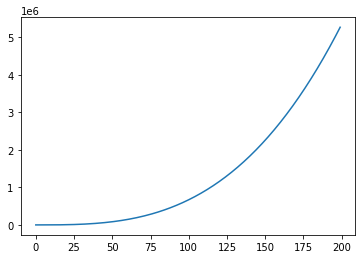

In [71]:
plt.plot(flops)

## Flops

Embora os resultados obtidos anteriormente nos dêem uma ideia da curva de crescimento do número de flops, melhor seria se tivermos uma fórmula fechada que nos desse a quantidade de flops.

Em algumas situações, isso é possível.

## Flops

Considere o problema de calcular o produto de uma matriz $\mathbf{A}_{m \times n}$  e um vetor $\mathbf{x}_{n\times 1}$.

1: $\mathbf{b} = \mathbf{0}$  
2: **para** $i = 1$ **até** $m$:  
3: &emsp;**para** $j = 1$ **até** $n$:  
4: &emsp;&emsp;$b_{i} \gets b_{i} + a_{ij}x_{j}$  

A quantidade de flops fica determinada pela linha 4.

## Flops

1: $\mathbf{b} = \mathbf{0}$  
2: **para** $i = 1$ **até** $m$:  
3: &emsp;**para** $j = 1$ **até** $n$:  
4: &emsp;&emsp;$b_{i} \gets b_{i} + a_{ij}x_{j}$  

Do laço em $j$, temos

$$\displaystyle
{\color{white}\sum_{\color{white}i \color{white}= \color{white}1}^{\color{white}m}}\sum_{j = 1}^{n} 2 = 2n \text{ flops}$$

## Flops

1: $\mathbf{b} = \mathbf{0}$  
2: **para** $i = 1$ **até** $m$:  
3: &emsp;**para** $j = 1$ **até** $n$:  
4: &emsp;&emsp;$b_{i} \gets b_{i} + a_{ij}x_{j}$  

Considerando agora o laço em $i$, obtemos

$$\displaystyle\sum_{i = 1}^{m}\sum_{j = 1}^{n} 2 = 2mn = O(mn) \text{ flops}$$

## Custo do escalonamento (sem pivotamento)

Procedendo de modo análogo para o algoritmo do escalonamento,

1: $\mathbf{y} = \mathbf{b}$  
2: $\mathbf{U} = \mathbf{A}$  
3: **para** $k = 1$ **até** $n - 1$:  
4: &emsp;**para** $i = k+1$ **até** $n$:  
5: &emsp;&emsp;$\ell = u_{ik} / u_{kk}$  
6: &emsp;&emsp;**para** $j = k+1$ **até** $n$  
7: &emsp;&emsp;&emsp;$u_{ij} = u_{ij} - \ell u_{kj}$  
8: &emsp;&emsp;$y_{i} = y_{i} - \ell y_{k}$  

## Custo do escalonamento (sem pivotamento)

obtemos o total de flops:

$$
\underbrace{\sum_{k=1}^{n-1}\sum_{i=k+1}^{n} 1}_{\text{linha }5} + 
\underbrace{\sum_{k=1}^{n-1}\sum_{i=k+1}^{n}\sum_{j=k+1}^{n} 2}_{\text{linha }7} + 
\underbrace{\sum_{k=1}^{n-1}\sum_{i=k+1}^{n} 2}_{\text{linha }8}
$$

## Custo do escalonamento (sem pivotamento)

$$
\underbrace{\frac{1}{2} n(n - 1)}_{\text{linha }5} + 
\underbrace{\frac{1}{3} (n - 1) n (2 n - 1)}_{\text{linha }7} +
\underbrace{n(n - 1)}_{\text{linha }8} =
O(n^3)
$$

## Custo da substituição regressiva

1: $x_n = y_n / u_{nn}$  
2: **para** $i = n - 1$ **até** 1:  
3: &emsp;$s = y_i$  
4: &emsp;**para** $j = i + 1$ **até** $n$:  
5: &emsp;&emsp;$s = s - u_{ij} x_j$  
6: &emsp;$x_i  = s / u_{ii}$  

## Custo da substituição regressiva

$$
\underbrace{\sum_{i=1}^{n-1}\sum_{j=i+1}^{n} 2}_{\text{linha }5} + 
\underbrace{\sum_{i=1}^{n-1} 1}_{\text{linha }6} =
\underbrace{n(n-1)}_{\text{linha }5} + 
\underbrace{n-1}_{\text{linha }6} = O(n^2)
$$

## Escalonamento usando fatiamento

A NumPy possui diversas funções otimizadas para o cálculo de operações matemáticas sobre arranjos.
A funcionalidade de fatiamento é uma delas.

In [72]:
def escalona_fatiado(A,b):
    n = A.shape[0]
    U = A.copy()
    y = b.copy()
    for k in range(0,n-1):
        for i in range(k+1,n): # linha i
            l = U[i,k]/U[k,k]
            #for j in range(k+1,n): # colunas da linha i
            #    U[i,j] = U[i,j] - l*U[k,j]
            U[i,k+1:n] = U[i,k+1:n] - l*U[k,k+1:n]
            y[i] = y[i] - l*y[k]
    
    return U,y

## Substituição usando fatiamento

Assim como no escalonamento, também pe possível otimizarmos o código da substituição.

In [73]:
def substitui_fatiado(U,y):
    n = U.shape[0]
    x = y.copy()
    x[n-1] = x[n-1]/U[n-1,n-1]
    for i in range(n-2,-1,-1):
        #for j in range(i+1,n):
        #    s = s - U[i,j]*x[j]
        #x[i] = s/U[i,i]
        x[i] = (x[i] - np.dot(U[i,i+1:n],x[i+1:n]))/U[i,i]
    return x

## Resolvendo sistema com fatiamento

In [74]:
def resolve_fatiado(A,b):
    U,y = escalona_fatiado(A,b)
    return substitui_fatiado(U,y)

## Substituição usando fatiamento

In [75]:
A = np.array([[1.0,  -1.0, 0.0],
              [2.0, 0.0, 3.0],
              [4.0,  -1.0, 2.0]])

b = np.array([-1.0, 1.0, -2.0])

resolve_fatiado(A,b)

np.dot(A,x) == b

array([ True,  True,  True])

## Com x Sem fatiamento

In [76]:
n = 256 # número de linhas/colunas

# Gera uma matriz não singular n x n
A = np.random.rand(n)
A = 0.5 * (A + A.T) # A é simétrica
A = A + (n * np.eye(n)) # A positiva definida

# Gera um vetor independente aleatório
b = np.random.rand(n,1)

## Com x Sem fatiamento

In [77]:
%%time
U,y = escalona(A,b) # Cython

CPU times: user 8.09 s, sys: 424 ms, total: 8.51 s
Wall time: 8 s


In [78]:
%%time
U,y = escalona_fatiado(A,b) # Pythonico

CPU times: user 1.19 s, sys: 134 ms, total: 1.33 s
Wall time: 1.18 s


## Decomposição LU (sem pivotamento)

1: $\mathbf{U} = \mathbf{A}$  
2: **para** $k = 1$ **até** $n - 1$:  
3: &emsp;**para** $i = k+1$ **até** $n$:  
4: &emsp;&emsp;$\ell = u_{ik} / u_{kk}$  
5: &emsp;&emsp;**para** $j = k+1$ **até** $n$  
6: &emsp;&emsp;&emsp;$u_{ij} = u_{ij} - \ell u_{kj}$  

## Decomposição LU (sem pivotamento)

1: $\mathbf{U} = \mathbf{A}$  
2: **para** $k = 1$ **até** $n - 1$:  
3: &emsp;**para** $i = k+1$ **até** $n$:  
4: &emsp;&emsp;$\ell = u_{ik} / u_{kk}$  
5: &emsp;&emsp;**para** $j = k+1$ **até** $n$  
6: &emsp;&emsp;&emsp;$u_{ij} = u_{ij} - \ell u_{kj}$  
7: &emsp;&emsp;$u_{ik} = \ell$  

## Decomposição LU (sem pivotamento)

In [79]:
def lu(A):
    n = A.shape[0]
    U = A.copy()
    for k in range(n-1):
        for i in range(k+1,n):
            l = U[i,k]/U[k,k]
            U[i,k+1:n] = U[i,k+1:n] - l*U[k,k+1:n]
            U[i,k] = l
    return U

## Decomposição LU (sem pivotamento)

In [80]:
A = np.array([[4.0,  6.0, 10.0],
              [6.0, 25.0, 19.0],
              [10.0,  19.0, 62.0]])

B = lu(A) # decomposição LU na forma compacta
B

array([[ 4.  ,  6.  , 10.  ],
       [ 1.5 , 16.  ,  4.  ],
       [ 2.5 ,  0.25, 36.  ]])

## Decomposição LU (sem pivotamento)

In [81]:
L = np.tril(B,-1) + np.eye(A.shape[0])
L

array([[1.  , 0.  , 0.  ],
       [1.5 , 1.  , 0.  ],
       [2.5 , 0.25, 1.  ]])

## Decomposição LU (sem pivotamento)

In [82]:
U = np.triu(B)
U

array([[ 4.,  6., 10.],
       [ 0., 16.,  4.],
       [ 0.,  0., 36.]])

## Decomposição LU (sem pivotamento)

In [83]:
A == np.dot(L,U)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

## Custo da decomposição LU (sem pivotamento)

Como a decomposição LU requer a realização do escalonamento, inevitavelmente seu custo é $O(n^3)$.

## Resolvendo um sistema com a decomposição LU

In [84]:
def lu_resolve(A,b):
    n = A.shape[0]
    U = lu(A) # forma compacta da decomposição LU
    x = b.copy()
    # substituição progressiva: Ly = b
    for i in range(1,n):
        x[i] = x[i] - np.dot(U[i,0:i],x[0:i])
       
    # substituição regressiva: Ux = y
    x[n-1] = x[n-1]/U[n-1,n-1]
    for i in range(n-2,-1,-1):
        x[i] = (x[i] - np.dot(U[i,i+1:n],x[i+1:n]))/U[i,i]

    return x

## Resolvendo um sistema com a decomposição LU

In [85]:
A = np.array([[1.0,  -1.0, 0.0],
              [2.0, 0.0, 3.0],
              [4.0,  -1.0, 2.0]])

b = np.array([-1.0, 1.0, -2.0])

lu_resolve(A,b)

array([-1.,  0.,  1.])

## Decomposição LU (com pivotamento)

In [86]:
def plu(A):
    n = A.shape[0]
    U = A.copy()
    p = np.arange(n) # vetor de permutação inicial
    for k in range(n-1):
        # escolhe pivô para a coluna k (pivotamento parcial simples)
        j = np.argmax(abs(U[p[k:n],k])) + k
        # atualiza vetor de permutação
        p[k], p[j] = p[j], p[k]
        
        for i in range(k+1,n): # atualizamos a linha p[i]
            l = U[p[i],k]/U[p[k],k]
            U[p[i],k+1:n] = U[p[i],k+1:n] - l*U[p[k],k+1:n]
            U[p[i],k] = l
            
    return U,p

## Decomposição LU (com pivotamento)

In [87]:
A = np.array([[1.0,  -1.0, 0.0],
              [2.0, 0.0, 3.0],
              [4.0,  -1.0, 2.0]])

U,p = plu(A)
L = np.tril(U[p],-1) + np.eye(U.shape[0])
U = np.triu(U[p])
P = np.eye(3)
P[p],L,U

(array([[0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.]]),
 array([[ 1.        ,  0.        ,  0.        ],
        [ 0.25      ,  1.        ,  0.        ],
        [ 0.5       , -0.66666667,  1.        ]]),
 array([[ 4.        , -1.        ,  2.        ],
        [ 0.        , -0.75      , -0.5       ],
        [ 0.        ,  0.        ,  1.66666667]]))

## Resolvendo um sistema com a decomposição LU

In [88]:
def plu_resolve(A,b):
    n = A.shape[0]
    U,p = plu(A)
    # Ly = Pb
    y = np.zeros(b.shape)
    y[0] = b[p[0]]
    for i in range(1,n):
        y[i] = b[p[i]] - np.dot(U[p[i],0:i],y[0:i])
        
    # Ux = y
    x = np.zeros(b.shape)
    x[n-1] = y[n-1]/U[p[n-1],n-1]
    for i in range(n-2,-1,-1):
        x[i] = (y[i] - np.dot(U[p[i],i+1:n],x[i+1:n]))/U[p[i],i]
        
    return x

## Resolvendo um sistema com a decomposição LU

In [89]:
A = np.array([[1.0,  -1.0, 0.0],
              [2.0, 0.0, 3.0],
              [4.0,  -1.0, 2.0]])

b = np.array([-1.0, 1.0, -2.0])


plu_resolve(A,b)

array([-1., -0.,  1.])

<br>
&copy; 2021 Vicente Helano<br>
UFCA | Centro de Ciências e Tecnologia